- https://platform.openai.com/docs/api-reference/images
- https://platform.openai.com/docs/guides/images-vision

In [1]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [16]:
import os
from openai import OpenAI
from dotenv import find_dotenv, load_dotenv
import requests

In [3]:
import warnings

# Ignore only DeprecationWarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [4]:
_ : bool = load_dotenv(find_dotenv()) # read local .env file

client : OpenAI = OpenAI()

In [5]:
_

True

In [6]:
# Get the key
api_key = os.getenv("OPENAI_API_KEY")

# Check and print whether it's loaded
if api_key:
    print("🔐 OpenAI Key Loaded:", bool(api_key))  # True or False
if not api_key:
    raise EnvironmentError("❌ OPENAI_API_KEY not found in .env file!")

🔐 OpenAI Key Loaded: True


In [10]:
# List all available models
models = client.models.list()
print(models)

for model in models.data:
    display(f"ID: {model.id} | Owned by: {model.owned_by}")

SyncPage[Model](data=[Model(id='gpt-4-0613', created=1686588896, object='model', owned_by='openai'), Model(id='gpt-4', created=1687882411, object='model', owned_by='openai'), Model(id='gpt-3.5-turbo', created=1677610602, object='model', owned_by='openai'), Model(id='o4-mini-deep-research-2025-06-26', created=1750866121, object='model', owned_by='system'), Model(id='codex-mini-latest', created=1746673257, object='model', owned_by='system'), Model(id='gpt-4o-realtime-preview-2025-06-03', created=1748907838, object='model', owned_by='system'), Model(id='gpt-4o-audio-preview-2025-06-03', created=1748908498, object='model', owned_by='system'), Model(id='o4-mini-deep-research', created=1749685485, object='model', owned_by='system'), Model(id='davinci-002', created=1692634301, object='model', owned_by='system'), Model(id='babbage-002', created=1692634615, object='model', owned_by='system'), Model(id='gpt-3.5-turbo-instruct', created=1692901427, object='model', owned_by='system'), Model(id='gp

'ID: gpt-4-0613 | Owned by: openai'

'ID: gpt-4 | Owned by: openai'

'ID: gpt-3.5-turbo | Owned by: openai'

'ID: o4-mini-deep-research-2025-06-26 | Owned by: system'

'ID: codex-mini-latest | Owned by: system'

'ID: gpt-4o-realtime-preview-2025-06-03 | Owned by: system'

'ID: gpt-4o-audio-preview-2025-06-03 | Owned by: system'

'ID: o4-mini-deep-research | Owned by: system'

'ID: davinci-002 | Owned by: system'

'ID: babbage-002 | Owned by: system'

'ID: gpt-3.5-turbo-instruct | Owned by: system'

'ID: gpt-3.5-turbo-instruct-0914 | Owned by: system'

'ID: dall-e-3 | Owned by: system'

'ID: dall-e-2 | Owned by: system'

'ID: gpt-4-1106-preview | Owned by: system'

'ID: gpt-3.5-turbo-1106 | Owned by: system'

'ID: tts-1-hd | Owned by: system'

'ID: tts-1-1106 | Owned by: system'

'ID: tts-1-hd-1106 | Owned by: system'

'ID: text-embedding-3-small | Owned by: system'

'ID: text-embedding-3-large | Owned by: system'

'ID: gpt-4-0125-preview | Owned by: system'

'ID: gpt-4-turbo-preview | Owned by: system'

'ID: gpt-3.5-turbo-0125 | Owned by: system'

'ID: gpt-4-turbo | Owned by: system'

'ID: gpt-4-turbo-2024-04-09 | Owned by: system'

'ID: gpt-4o | Owned by: system'

'ID: gpt-4o-2024-05-13 | Owned by: system'

'ID: gpt-4o-mini-2024-07-18 | Owned by: system'

'ID: gpt-4o-mini | Owned by: system'

'ID: gpt-4o-2024-08-06 | Owned by: system'

'ID: chatgpt-4o-latest | Owned by: system'

'ID: o1-preview-2024-09-12 | Owned by: system'

'ID: o1-preview | Owned by: system'

'ID: o1-mini-2024-09-12 | Owned by: system'

'ID: o1-mini | Owned by: system'

'ID: gpt-4o-realtime-preview-2024-10-01 | Owned by: system'

'ID: gpt-4o-audio-preview-2024-10-01 | Owned by: system'

'ID: gpt-4o-audio-preview | Owned by: system'

'ID: gpt-4o-realtime-preview | Owned by: system'

'ID: omni-moderation-latest | Owned by: system'

'ID: omni-moderation-2024-09-26 | Owned by: system'

'ID: gpt-4o-realtime-preview-2024-12-17 | Owned by: system'

'ID: gpt-4o-audio-preview-2024-12-17 | Owned by: system'

'ID: gpt-4o-mini-realtime-preview-2024-12-17 | Owned by: system'

'ID: gpt-4o-mini-audio-preview-2024-12-17 | Owned by: system'

'ID: o1-2024-12-17 | Owned by: system'

'ID: o1 | Owned by: system'

'ID: gpt-4o-mini-realtime-preview | Owned by: system'

'ID: gpt-4o-mini-audio-preview | Owned by: system'

'ID: o3-mini | Owned by: system'

'ID: o3-mini-2025-01-31 | Owned by: system'

'ID: gpt-4o-2024-11-20 | Owned by: system'

'ID: gpt-4o-search-preview-2025-03-11 | Owned by: system'

'ID: gpt-4o-search-preview | Owned by: system'

'ID: gpt-4o-mini-search-preview-2025-03-11 | Owned by: system'

'ID: gpt-4o-mini-search-preview | Owned by: system'

'ID: gpt-4o-transcribe | Owned by: system'

'ID: gpt-4o-mini-transcribe | Owned by: system'

'ID: o1-pro-2025-03-19 | Owned by: system'

'ID: o1-pro | Owned by: system'

'ID: gpt-4o-mini-tts | Owned by: system'

'ID: o4-mini-2025-04-16 | Owned by: system'

'ID: o4-mini | Owned by: system'

'ID: gpt-4.1-2025-04-14 | Owned by: system'

'ID: gpt-4.1 | Owned by: system'

'ID: gpt-4.1-mini-2025-04-14 | Owned by: system'

'ID: gpt-4.1-mini | Owned by: system'

'ID: gpt-4.1-nano-2025-04-14 | Owned by: system'

'ID: gpt-4.1-nano | Owned by: system'

'ID: gpt-image-1 | Owned by: system'

'ID: gpt-3.5-turbo-16k | Owned by: openai-internal'

'ID: tts-1 | Owned by: openai-internal'

'ID: whisper-1 | Owned by: openai-internal'

'ID: text-embedding-ada-002 | Owned by: openai-internal'

| `owned_by` value      | Meaning                                                                                                                     |
| --------------------- | --------------------------------------------------------------------------------------------------------------------------- |
| **`openai`**          | Publicly available models provided directly by OpenAI (e.g. `gpt-4o`)                                                       |
| **`system`**          | Internal system models used by OpenAI platform for routing, search, or special tasks. Not intended for public use directly. |
| **`openai-internal`** | Models used internally by OpenAI employees or APIs (may be under testing or limited release)                                |


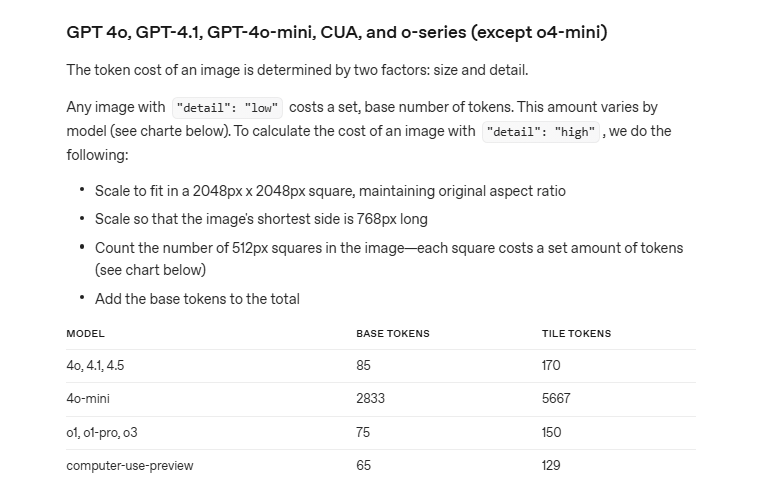

## **Passing a URL**

In [11]:
from openai import OpenAI

client : OpenAI = OpenAI()

try:
    response = client.chat.completions.create(
        model="gpt-4o",  
        messages=[
            {
                "role": "user",
                "content": [
                    {"type": "text", "text": "What's in this image?"},
                    {
                        "type": "image_url",
                        "image_url": {
                            "url": "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg"
                        }
                    },
                ],
            }
        ],
        max_tokens=300,
    )
    print(response.choices[0])
except Exception as e:
    print("This model does NOT support vision.")
    print(e)

Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='The image shows a scenic view of a wooden boardwalk path surrounded by lush greenery and tall grass. The sky above is a vibrant blue with scattered clouds, suggesting a bright, serene day. Trees and shrubs are visible in the background. It is likely a natural or park setting, providing a peaceful and inviting atmosphere.', refusal=None, role='assistant', annotations=[], audio=None, function_call=None, tool_calls=None))


In [12]:
dict(response.choices[0])

{'finish_reason': 'stop',
 'index': 0,
 'logprobs': None,
 'message': ChatCompletionMessage(content='The image shows a scenic view of a wooden boardwalk path surrounded by lush greenery and tall grass. The sky above is a vibrant blue with scattered clouds, suggesting a bright, serene day. Trees and shrubs are visible in the background. It is likely a natural or park setting, providing a peaceful and inviting atmosphere.', refusal=None, role='assistant', annotations=[], audio=None, function_call=None, tool_calls=None)}

In [13]:
print(response.choices[0].message.content)

The image shows a scenic view of a wooden boardwalk path surrounded by lush greenery and tall grass. The sky above is a vibrant blue with scattered clouds, suggesting a bright, serene day. Trees and shrubs are visible in the background. It is likely a natural or park setting, providing a peaceful and inviting atmosphere.


## **Passing a Base64 encoded image (Using client)**

In [14]:
import base64
from openai import OpenAI

client = OpenAI()

# Function to encode the image
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")


# Path to your image
image_path = "Istanbul.jpg"

# Getting the Base64 string
base64_image = encode_image(image_path)


response = client.responses.create(
    model="gpt-4.1",
    input=[
        {
            "role": "user",
            "content": [
                { "type": "input_text", "text": "what's in this image?" },
                {
                    "type": "input_image",
                    "image_url": f"data:image/jpeg;base64,{base64_image}",
                },
            ],
        }
    ],
)

print(response.output_text)

This image depicts a large, beautifully illuminated mosque at night, with six tall minarets and a central dome. In the background, there is a large full moon rising or setting, creating a striking and dramatic visual effect. The mosque is situated on a hill above a city, with buildings and lights visible in the foreground. The overall scene is serene and picturesque, combining architectural beauty with a natural phenomenon.

The mosque in the image closely resembles the Çamlıca Mosque in Istanbul, Turkey, which is known for its impressive size and modern design, including six minarets.


#### **Using request library and api key**

In [18]:
# Function to encode the image
def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

# Path to your image
image_path = "Istanbul.jpg"

# Getting the base64 string
base64_image = encode_image(image_path)

headers = {
  "Content-Type": "application/json",
  "Authorization": f"Bearer {api_key}"
}

payload = {
  "model": "gpt-4.1",
  "messages": [
    {
      "role": "user",
      "content": [
        {
          "type": "text",
          "text": "What’s in this image?"
        },
        {
          "type": "image_url",
          "image_url": {
            "url": f"data:image/jpeg;base64,{base64_image}"
          }
        }
      ]
    }
  ],
  "max_tokens": 300
}

response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)

print(response.json())

{'id': 'chatcmpl-Bw13J51omiAnlqlxTVoMiSk9vgJ9q', 'object': 'chat.completion', 'created': 1753166769, 'model': 'gpt-4.1-2025-04-14', 'choices': [{'index': 0, 'message': {'role': 'assistant', 'content': 'This image shows a beautifully lit mosque at night, with a large, bright full moon rising behind it. The mosque has multiple minarets and domes, and the structure is illuminated with warm lights, creating a striking contrast against the deep blue evening sky. The scene appears tranquil and majestic, with city buildings visible in the foreground. This mosque is the **Çamlıca Mosque** in Istanbul, Turkey, known for being the largest mosque in the country. The photograph captures a visually stunning moment with the full moon perfectly positioned behind one of the mosque’s minarets.', 'refusal': None, 'annotations': []}, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 1118, 'completion_tokens': 116, 'total_tokens': 1234, 'prompt_tokens_details': {'cached_tokens': 0, '

In [24]:
print(response.json()["choices"][0]["message"]["content"])

This image shows a beautifully lit mosque at night, with a large, bright full moon rising behind it. The mosque has multiple minarets and domes, and the structure is illuminated with warm lights, creating a striking contrast against the deep blue evening sky. The scene appears tranquil and majestic, with city buildings visible in the foreground. This mosque is the **Çamlıca Mosque** in Istanbul, Turkey, known for being the largest mosque in the country. The photograph captures a visually stunning moment with the full moon perfectly positioned behind one of the mosque’s minarets.


In [25]:
print(response.json().get('choices')[0].get('message').get('content'))

This image shows a beautifully lit mosque at night, with a large, bright full moon rising behind it. The mosque has multiple minarets and domes, and the structure is illuminated with warm lights, creating a striking contrast against the deep blue evening sky. The scene appears tranquil and majestic, with city buildings visible in the foreground. This mosque is the **Çamlıca Mosque** in Istanbul, Turkey, known for being the largest mosque in the country. The photograph captures a visually stunning moment with the full moon perfectly positioned behind one of the mosque’s minarets.


## **Passing a file ID**

In [26]:
from openai import OpenAI

client = OpenAI()

# Function to create a file with the Files API
def create_file(file_path):
  with open(file_path, "rb") as file_content:
    result = client.files.create(
        file=file_content,
        purpose="vision",
    )
    return result.id

# Getting the file ID
file_id = create_file("Istanbul.jpg")

response = client.responses.create(
    model="gpt-4.1-mini",
    input=[{
        "role": "user",
        "content": [
            {"type": "input_text", "text": "what's in this image?"},
            {
                "type": "input_image",
                "file_id": file_id,
            },
        ],
    }],
)

print(response.output_text)

The image shows a beautifully illuminated mosque at night with multiple minarets. The moon appears very large and is positioned in the sky in such a way that it aligns perfectly behind one of the mosque's minarets, creating a striking visual effect. The mosque is situated in a city with numerous smaller buildings and lights visible in the foreground. The sky is dark blue, indicating that it is either dusk or night.
